In [1]:
import numpy as np
import os
import pandas as pd
import optuna
import matplotlib.pyplot as plt
# Step 1: Change the working directory (update the path accordingly)
new_dir = "C:/Users/Andy/Documents/stock/"
os.chdir(new_dir)

C:\Users\Andy\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [8]:
# Step 1: Change the working directory (update the path accordingly)
new_dir = "C:/Users/Andy/Documents/stock/"
os.chdir(new_dir)

# Step 2: Define file name and chunk size (number of rows per chunk)
file_name = "training.csv"
total_rows = sum(1 for _ in open(file_name, encoding="utf-8", errors="ignore")) - 1
num_parts = 100
chunk_size = total_rows // num_parts  # Determine chunk size for splitting

# Step 3: Read and split the large CSV in chunks
reader = pd.read_csv(file_name, chunksize=chunk_size)

for i, chunk in enumerate(reader):
    output_filename = f"split_part_{i+1}.csv"
    chunk.to_csv(output_filename, index=False)
    print(f"Saved: {output_filename}")

print("Splitting complete!")

Saved: split_part_1.csv
Saved: split_part_2.csv
Saved: split_part_3.csv
Saved: split_part_4.csv
Saved: split_part_5.csv
Saved: split_part_6.csv
Saved: split_part_7.csv
Saved: split_part_8.csv
Saved: split_part_9.csv
Saved: split_part_10.csv
Saved: split_part_11.csv
Saved: split_part_12.csv
Saved: split_part_13.csv
Saved: split_part_14.csv
Saved: split_part_15.csv
Saved: split_part_16.csv
Saved: split_part_17.csv
Saved: split_part_18.csv
Saved: split_part_19.csv
Saved: split_part_20.csv
Saved: split_part_21.csv
Saved: split_part_22.csv
Saved: split_part_23.csv
Saved: split_part_24.csv
Saved: split_part_25.csv
Saved: split_part_26.csv
Saved: split_part_27.csv
Saved: split_part_28.csv
Saved: split_part_29.csv
Saved: split_part_30.csv
Saved: split_part_31.csv
Saved: split_part_32.csv
Saved: split_part_33.csv
Saved: split_part_34.csv
Saved: split_part_35.csv
Saved: split_part_36.csv
Saved: split_part_37.csv
Saved: split_part_38.csv
Saved: split_part_39.csv
Saved: split_part_40.csv
Saved: sp

In [130]:
# Step 1: Change the working directory (update the path accordingly)
new_dir = "C:/Users/Andy/Documents/stock/Testing/"
os.chdir(new_dir)

# Step 2: Define file name and chunk size (number of rows per chunk)
file_name = "public_x.csv"
total_rows = sum(1 for _ in open(file_name, encoding="utf-8", errors="ignore")) - 1
num_parts = 100
chunk_size = total_rows // num_parts  # Determine chunk size for splitting

# Step 3: Read and split the large CSV in chunks
reader = pd.read_csv(file_name, chunksize=chunk_size)

for i, chunk in enumerate(reader):
    output_filename = f"split_part_{i+1}.csv"
    chunk.to_csv(output_filename, index=False)
    print(f"Saved: {output_filename}")

print("Splitting complete!")

Saved: split_part_1.csv
Saved: split_part_2.csv
Saved: split_part_3.csv
Saved: split_part_4.csv
Saved: split_part_5.csv
Saved: split_part_6.csv
Saved: split_part_7.csv
Saved: split_part_8.csv
Saved: split_part_9.csv
Saved: split_part_10.csv
Saved: split_part_11.csv
Saved: split_part_12.csv
Saved: split_part_13.csv
Saved: split_part_14.csv
Saved: split_part_15.csv
Saved: split_part_16.csv
Saved: split_part_17.csv
Saved: split_part_18.csv
Saved: split_part_19.csv
Saved: split_part_20.csv
Saved: split_part_21.csv
Saved: split_part_22.csv
Saved: split_part_23.csv
Saved: split_part_24.csv
Saved: split_part_25.csv
Saved: split_part_26.csv
Saved: split_part_27.csv
Saved: split_part_28.csv
Saved: split_part_29.csv
Saved: split_part_30.csv
Saved: split_part_31.csv
Saved: split_part_32.csv
Saved: split_part_33.csv
Saved: split_part_34.csv
Saved: split_part_35.csv
Saved: split_part_36.csv
Saved: split_part_37.csv
Saved: split_part_38.csv
Saved: split_part_39.csv
Saved: split_part_40.csv
Saved: sp

## Test on splited batched

In [2]:
from sklearn.metrics import precision_score, recall_score

In [3]:
df_sample = pd.read_csv("split_part_1.csv", nrows=1000)

In [4]:
import os
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

dtype_dict = {col: "float32" for col in df_sample.select_dtypes(include=["float64"]).columns}

# Step 1: Load and merge 10 CSV files
split_files = sorted([f for f in os.listdir() if f.startswith("split_part") and f.endswith(".csv")])[:20]  # First 10 files
df_list = [pd.read_csv(file, dtype=dtype_dict) for file in split_files]  # Read each file
df = pd.concat(df_list, ignore_index=True)  # Merge datasets


In [5]:
df = pd.concat(df_list, ignore_index=True)

In [29]:
df.columns

Index(['ID', '外資券商_分點進出', '外資券商_分點買賣力', '外資券商_分點成交力(%)', '外資券商_分點吃貨比(%)',
       '外資券商_分點出貨比(%)', '外資券商_前1天分點進出', '外資券商_前1天分點買賣力', '外資券商_前1天分點成交力(%)',
       '外資券商_前1天分點吃貨比(%)',
       ...
       '上市加權指數前15天成交量', '上市加權指數前16天成交量', '上市加權指數前17天成交量', '上市加權指數前18天成交量',
       '上市加權指數前19天成交量', '上市加權指數前20天成交量', '上市加權指數5天成交量波動度', '上市加權指數10天成交量波動度',
       '上市加權指數20天成交量波動度', '飆股'],
      dtype='object', length=10214)

In [30]:
df.shape

(38216, 10214)

In [31]:
print(df.info(memory_usage="deep")) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38216 entries, 0 to 38215
Columns: 10214 entries, ID to 飆股
dtypes: float32(10212), int64(1), object(1)
memory usage: 1.5 GB
None


## Reduce file

In [6]:
threshold = 0.95  # Keep only columns with ≥ 5% data
df = df.dropna(axis=1, thresh=int(threshold * len(df)))

In [7]:
print(df.info(memory_usage="deep")) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38216 entries, 0 to 38215
Columns: 673 entries, ID to 飆股
dtypes: float32(671), int64(1), object(1)
memory usage: 100.5 MB
None


In [8]:
df.shape

(38216, 673)

In [35]:
df.columns

Index(['ID', '外資券商_分點進出', '外資券商_分點成交力(%)', '外資券商_分點吃貨比(%)', '外資券商_分點出貨比(%)',
       '外資券商_前1天分點進出', '外資券商_前1天分點成交力(%)', '外資券商_前1天分點吃貨比(%)',
       '外資券商_前1天分點出貨比(%)', '外資券商_前2天分點進出',
       ...
       '上市加權指數前15天成交量', '上市加權指數前16天成交量', '上市加權指數前17天成交量', '上市加權指數前18天成交量',
       '上市加權指數前19天成交量', '上市加權指數前20天成交量', '上市加權指數5天成交量波動度', '上市加權指數10天成交量波動度',
       '上市加權指數20天成交量波動度', '飆股'],
      dtype='object', length=673)

## Save trim data out

In [126]:
# Step 1: Define input and output paths
input_folder = "."   # Folder containing split files
output_folder = "Trim_train/"  # Folder to save the merged dataset
output_file = os.path.join(output_folder, "merged_cleaned_data.csv")  # Final dataset path

# Step 2: Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Step 3: Get the first 20 split files
split_files = sorted([f for f in os.listdir(input_folder) if f.startswith("split_part") and f.endswith(".csv")])[:101]

# Step 4: Use predefined columns (from df.columns)
columns_to_keep = list(df.columns)  # Ensure it's a list of selected columns

# Step 5: Read and merge datasets
df_list = []  # Store cleaned DataFrames

for file in split_files:
    file_path = os.path.join(input_folder, file)
    print(f"Processing {file}...")

    # Read only the required columns to save memory
    df_trimmed = pd.read_csv(file_path, usecols=columns_to_keep)

    # Append to list for merging
    df_list.append(df_trimmed)

# Step 6: Merge all datasets into one
df_merged = pd.concat(df_list, ignore_index=True)

# Step 7: Save the final merged dataset
df_merged.to_csv(output_file, index=False)

print(f"✅ Final cleaned and merged dataset saved: {output_file}")

Processing split_part_1.csv...
Processing split_part_10.csv...
Processing split_part_100.csv...
Processing split_part_101.csv...
Processing split_part_11.csv...
Processing split_part_12.csv...
Processing split_part_13.csv...
Processing split_part_14.csv...
Processing split_part_15.csv...
Processing split_part_16.csv...
Processing split_part_17.csv...
Processing split_part_18.csv...
Processing split_part_19.csv...
Processing split_part_2.csv...
Processing split_part_20.csv...
Processing split_part_21.csv...
Processing split_part_22.csv...
Processing split_part_23.csv...
Processing split_part_24.csv...
Processing split_part_25.csv...
Processing split_part_26.csv...
Processing split_part_27.csv...
Processing split_part_28.csv...
Processing split_part_29.csv...
Processing split_part_3.csv...
Processing split_part_30.csv...
Processing split_part_31.csv...
Processing split_part_32.csv...
Processing split_part_33.csv...
Processing split_part_34.csv...
Processing split_part_35.csv...
Processin

In [133]:
# testing
# Step 1: Define input and output paths
input_folder = "."   # Folder containing split files
output_folder = "."  # Folder to save the merged dataset
output_file = os.path.join(output_folder, "merged_cleaned_test.csv")  # Final dataset path

# Step 2: Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Step 3: Get the first 20 split files
split_files = sorted([f for f in os.listdir(input_folder) if f.startswith("split_part") and f.endswith(".csv")])[:101]

# Step 4: Use predefined columns (from df.columns)
columns_to_keep = list(df.columns.drop('飆股'))  # Ensure it's a list of selected columns

# Step 5: Read and merge datasets
df_list = []  # Store cleaned DataFrames

for file in split_files:
    file_path = os.path.join(input_folder, file)
    print(f"Processing {file}...")

    # Read only the required columns to save memory
    df_trimmed = pd.read_csv(file_path, usecols=columns_to_keep)

    # Append to list for merging
    df_list.append(df_trimmed)

# Step 6: Merge all datasets into one
df_merged = pd.concat(df_list, ignore_index=True)

# Step 7: Save the final merged dataset
df_merged.to_csv(output_file, index=False)

print(f"✅ Final cleaned and merged dataset saved: {output_file}")

Processing split_part_1.csv...
Processing split_part_10.csv...
Processing split_part_100.csv...
Processing split_part_101.csv...
Processing split_part_11.csv...
Processing split_part_12.csv...
Processing split_part_13.csv...
Processing split_part_14.csv...
Processing split_part_15.csv...
Processing split_part_16.csv...
Processing split_part_17.csv...
Processing split_part_18.csv...
Processing split_part_19.csv...
Processing split_part_2.csv...
Processing split_part_20.csv...
Processing split_part_21.csv...
Processing split_part_22.csv...
Processing split_part_23.csv...
Processing split_part_24.csv...
Processing split_part_25.csv...
Processing split_part_26.csv...
Processing split_part_27.csv...
Processing split_part_28.csv...
Processing split_part_29.csv...
Processing split_part_3.csv...
Processing split_part_30.csv...
Processing split_part_31.csv...
Processing split_part_32.csv...
Processing split_part_33.csv...
Processing split_part_34.csv...
Processing split_part_35.csv...
Processin

In [9]:
df_copy = df

In [10]:
from pypinyin import lazy_pinyin
df.columns = [lazy_pinyin(col)[0] for col in df.columns]

In [11]:
target_column = "biao" 

In [12]:
X = df.drop(columns=[target_column, "ID"], errors="ignore")
y = df[target_column]

In [13]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
X_train.columns = X_train.columns.astype(str)
X_test.columns =X_test.columns.astype(str)

# Rename duplicate columns by adding a suffix (_1, _2, etc.)
X_train.columns = pd.Series(X_train.columns).astype(str) + "_" + pd.Series(X_train.columns).groupby(X_train.columns).cumcount().astype(str)
X_test.columns = pd.Series(X_test.columns).astype(str) + "_" + pd.Series(X_test.columns).groupby(X_test.columns).cumcount().astype(str)


In [30]:

# Drop the highly correlated features from dataset
X_train_trimmed = X_train.drop(columns=high_corr_features)
X_test_trimmed = X_test.drop(columns=high_corr_features)

print(f"✅ Reduced from {X_train.shape[1]} to {X_train_trimmed.shape[1]} features")

NameError: name 'high_corr_features' is not defined

### log transformation

In [108]:
# Copy original data to avoid modifying the raw dataset
X_train_transformed = X_train.copy()
X_test_transformed = X_test.copy()

for col in X_train.columns:
    if X_train[col].skew() > 1:  # Only transform highly skewed features
        X_train_transformed[col] = np.log1p(X_train[col])  # log(1+x) to avoid log(0) issues
        X_test_transformed[col] = np.log1p(X_test[col])    # Apply same transformation

# Replace original datasets with transformed ones
X_train = X_train_transformed
X_test = X_test_transformed

C:\Users\Andy\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [110]:
X_train_transformed.head()

,wai_0,wai_1,wai_2,wai_3,wai_4,wai_5,wai_6,wai_7,wai_8,wai_9,...,shang_45,shang_46,shang_47,shang_48,shang_49,shang_50,shang_51,shang_52,shang_53,shang_54
15782,0.885955,3.1019,1.468082,0.859932,0.847326,1.3147,0.893881,0.605627,0.848996,1.2971,...,0.520875,0.434506,0.567074,0.411845,0.684510,0.845697,0.653106,0.477538,0.028879,0.338755
24264,0.797327,0.8370,0.740555,0.913086,0.802226,1.2062,0.719984,0.475240,0.799038,1.1222,...,1.019894,1.396368,0.708627,0.619339,0.769877,0.861454,0.874760,0.549104,0.426705,1.083938
16770,0.798363,NaN,NaN,NaN,0.800116,1.2238,0.420551,0.428074,0.799442,1.2239,...,0.348471,0.625350,0.568377,0.373974,0.151089,0.204246,0.484276,0.259745,0.210018,0.513123
33659,0.356135,-1.3438,0.783445,1.568116,0.643116,0.9199,0.714077,1.277009,0.841309,0.4728,...,0.795162,0.605026,0.500654,0.313715,0.261518,0.492499,0.438706,0.254952,0.480882,0.495001
29634,0.789230,-0.6540,1.143522,1.612533,0.785544,1.1502,1.550176,1.809616,0.795388,0.9035,...,0.744553,0.756498,0.728659,0.676764,0.807903,0.756169,0.719302,0.174877,0.700222,0.708774


### Outliers

In [135]:
# Compute IQR for each feature
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold (1.5 * IQR rule)
outlier_mask = ~((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter data
X_train_filtered = X_train[outlier_mask]
X_test_filtered = X_test[outlier_mask]

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [136]:
outlier_mask

15782    False
24264    False
16770    False
33659    False
29634    False
         ...  
5138     False
26965    False
24265    False
10969    False
14616    False
Length: 30572, dtype: bool

In [133]:
bigModel.fit(X_train_filtered, y_train_filtered)


LGBMClassifier(bagging_seed=42, colsample_bytree=0.6628,
               feature_fraction_seed=42, learning_rate=0.1034836022674252,
               max_bin=113, min_child_samples=25, n_estimators=2994,
               num_leaves=20, objective='regression',
               subsample=0.7708753433144212, subsample_freq=5)

In [134]:
y_pred_proba = bigModel.predict_proba(X_test)[:, 1]  # Get probability for class 1
y_pred = (y_pred_proba >= 0.3).astype(int) 
f1_after_outlier_handling = f1_score(y_test, y_pred)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")

print(f"Model F1 Score: {f1:.4f}")

Precision: 0.558824
Recall: 0.351852
Model F1 Score: 0.4318


## Method 1

In [49]:
from sklearn.metrics import f1_score

In [115]:
# Step 4: Train LGBM Model
model = lgb.LGBMClassifier(objective='binary', metric='binary_error', n_estimators=100)
model.fit(X_train, y_train)

# Step 5: Evaluate Model
y_pred = model.predict(X_test)



In [116]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Compute F1 Score
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")

print(f"Model F1 Score: {f1:.4f}")

Precision: 0.444444
Recall: 0.148148
Model F1 Score: 0.2222


## Method 2

In [43]:
X = X.drop(columns=["ID"], errors="ignore")
y = df[target_column]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
arguments = {
    "objective": "regression",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "n_estimators": 100,
    "max_bin": 255,
    "subsample": 0.8,
    "subsample_freq": 1,
    "colsample_bytree": 0.8,
    "feature_fraction_seed": 42,
    "bagging_seed": 42,
    "min_child_samples": 20
}

In [78]:
arguments_best = {
    "objective": "regression",
    "boosting_type": "gbdt",
    "num_leaves": 20,
    "learning_rate": 0.1034836022674252,
    "n_estimators": 2994,
    "max_bin": 113,
    "subsample": 0.7708753433144212,
    "subsample_freq": 5,
    "colsample_bytree": 0.6628,
    "feature_fraction_seed": 42,
    "bagging_seed": 42,
    "min_child_samples": 25
}

In [126]:
bigModel = lgb.LGBMClassifier(**arguments_best)
bigModel.fit(X_train_trimmed, y_train)

# Step 6: Predict and Evaluate Accuracy


LGBMClassifier(bagging_seed=42, colsample_bytree=0.6628,
               feature_fraction_seed=42, learning_rate=0.1034836022674252,
               max_bin=113, min_child_samples=25, n_estimators=2994,
               num_leaves=20, objective='regression',
               subsample=0.7708753433144212, subsample_freq=5)

In [140]:
y_pred_proba = bigModel.predict_proba(X_test)[:, 1]  # Get probability for class 1
y_pred = (y_pred_proba >= 0.5).astype(int)  # Convert probabilities to 0/1

In [141]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.4f}")

C:\Users\Andy\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.000000
Recall: 0.000000
F1 Score: 0.0000


In [128]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.558824
Recall: 0.351852
F1 Score: 0.4318


### k--fold

In [137]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute F1 scores across folds
f1_scores = cross_val_score(bigModel, X, y, cv=skf, scoring='f1')

print(f"Mean F1 Score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")

Mean F1 Score: 0.1708 ± 0.0223


### Feature importance

In [96]:
bigModel.feature_importances_

array([ 37,  36,  44,  60,  96,  43,  75,  53, 100,  32,  64,  70, 105,
        47,  61,  55,  90,  45,  61,  69,  82,  38,  73,  57, 114,  66,
        84,  83,  84,  31,  84,  97, 104,  45,  64,  68, 107,  68,  86,
       117,  86,  54,  59,  75,  70,  72,  46,  66, 103,  44,  55,  73,
        85,  59,  61,  64,  87,  29,  61,  97,  89,  51,  65,  83,  79,
        65,  87,  65,  91,  55,  55,  84,  88,  46, 132,  58,  79,  48,
        61,  65,  84,  76,  82,  65,  50,  71,  66,  86,  50, 112,  80,
        88,  45, 107,  79,  97,  64,  79,  80,  77,  45,  89,  65,  96,
        60, 113,  61,  88,  30, 142,  81, 107,  35,  94,  94,  86,  61,
       137,  82,  91,  65, 160, 117,  94,  46, 107,  56, 118,  49,  89,
        96, 107,  45, 110, 132, 122,  42,  83,  87, 127,  55,  91,  88,
       117,  42,  87,  65, 110,  43, 114,  98,  97,  43, 102,  94, 176,
        36,  97,  85, 107,  45, 135,  95, 110,  38, 158,  77, 111, 156,
       123,  78,  61,  84,  90,  98,  72,  65, 114,  91,  74, 17

In [97]:
feature_importance = pd.DataFrame({"feature": X_train_trimmed.columns, "importance": bigModel.feature_importances_})
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

# Keep only top 200 most important features
top_features = feature_importance.head(200)["feature"].tolist()

In [147]:
# Reduce dataset
X_train_trimmed = X_train_trimmed[top_features]
X_test_trimmed = X_test_trimmed[top_features]

## Auto tune model

In [16]:
import optuna

# Define the objective function for optimization
def objective(trial):
    # Define hyperparameter search space
    params = {
        "objective": "binary",
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart"]),
        "num_leaves": trial.suggest_int("num_leaves", 10, 20),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.2),
        "n_estimators": trial.suggest_int("n_estimators", 1000, 10000),
        "max_bin": trial.suggest_int("max_bin", 100, 300),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "subsample_freq": trial.suggest_int("subsample_freq", 3, 15),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "feature_fraction_seed": 42,
        "bagging_seed": 42,
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 50)
    }

    # Split dataset for training
    X_train_opt, X_val, y_train_opt, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train model
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train_opt, y_train_opt, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=False)

    # Predict & Evaluate
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    y_pred = (y_pred_proba >= 0.3).astype(int)  # Adjust threshold if needed
    f1 = f1_score(y_val, y_pred)

    return f1  # Optuna will maximize this F1 Score

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5)  # Run 30 trials

# Show best parameters
print("Best Hyperparameters:", study.best_params)


[I 2025-03-17 12:42:17,704] A new study created in memory with name: no-name-2165f797-cd08-4e41-860d-0586c0403340
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernela

NameError: name 'train_test_split' is not defined

In [23]:
print("🔹 Best F1 Score:", study.best_value)
print("🔹 Best Hyperparameters:", study.best_params)

🔹 Best F1 Score: 0.41269841269841273
🔹 Best Hyperparameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.1034836022674252, 'n_estimators': 2994, 'max_bin': 113, 'subsample': 0.7708753433144212, 'subsample_freq': 5, 'colsample_bytree': 0.6628069663827945, 'min_child_samples': 25}


In [21]:
# Print all F1 scores and their corresponding parameters
for trial in study.trials:
    print(f"Trial {trial.number}: F1 Score = {trial.value:.4f}")
    print(f"Parameters: {trial.params}\n")

[W 2025-03-17 12:42:52,281] Caught an error from sqlalchemy: (sqlite3.OperationalError) too many SQL variables
[SQL: SELECT trials.trial_id AS trials_trial_id, trials.number AS trials_number, trials.study_id AS trials_study_id, trials.state AS trials_state, trials.datetime_start AS trials_datetime_start, trials.datetime_complete AS trials_datetime_complete 
FROM trials 
WHERE trials.trial_id IN (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?

TypeError: unsupported format string passed to NoneType.__format__

In [12]:
import psutil

# Get available memory in GB
available_memory = psutil.virtual_memory().available / (1024 ** 3)
total_memory = psutil.virtual_memory().total / (1024 ** 3)

print(f"🔹 Available Memory: {available_memory:.2f} GB / {total_memory:.2f} GB")

🔹 Available Memory: 2.82 GB / 15.83 GB


In [19]:
db_path = "model_parameter_result/optuna_results.db"  # Update with actual path
study = optuna.load_study(study_name="lgbm_f1_optimization", storage=f"sqlite:///{db_path}")

In [252]:








# Run optimization (this will continue from previous trials)
study.optimize(objective, n_trials=1000)

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-16 23:44:18,237] Trial 11 finished with value: 0.19178082191780824 and parameters: {'boosting

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-16 23:44:53,712] Trial 17 finished with value: 0.06451612903225808 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 84, 'learning_rate': 0.10069423131054865, 'n_estimators': 1576, 'max_bin': 258, 'subsample': 0.8148427833562093, 'subsample_freq': 7, 'colsample_bytree': 0.8817172416239587, 'min_child_samples': 35}. Best is trial 13 with value: 0.21875.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Us

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-16 23:45:49,037] Trial 24 finished with value: 0.20512820512820515 and parameters: {'boosting

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-16 23:47:19,468] Trial 30 finished with value: 0.12903225806451615 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 91, 'learning_rate': 0.0850984943825954, 'n_estimators': 1331, 'max_bin': 181, 'subsample': 0.9007022290060449, 'subsample_freq': 5, 'colsample_bytree': 0.7032748405495869, 'min_child_samples': 6}. Best is trial 29 with value: 0.2631578947368421.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stu

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-16 23:48:50,908] Trial 37 finished with value: 0.0909090909090909 and parameters: {'boosting_

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-16 23:50:45,927] Trial 43 finished with value: 0.16666666666666666 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 96, 'learning_rate': 0.11742995414360351, 'n_estimators': 709, 'max_bin': 167, 'subsample': 0.9381018621417718, 'subsample_freq': 5, 'colsample_bytree': 0.8921304647251631, 'min_child_samples': 12}. Best is trial 29 with value: 0.2631578947368421.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykern

[I 2025-03-16 23:51:13,784] Trial 49 finished with value: 0.047619047619047616 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 97, 'learning_rate': 0.02716965999382357, 'n_estimators': 2937, 'max_bin': 242, 'subsample': 0.9341119940605288, 'subsample_freq': 5, 'colsample_bytree': 0.860487390201922, 'min_child_samples': 11}. Best is trial 29 with value: 0.2631578947368421.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Ana

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-16 23:51:40,355] Trial 56 finished with value: 0.20512820512820515 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'learning_rate': 0.10979907660690374, 'n_estimators': 3205, 'max_bin': 141, 'subsample': 0.7089195555209625, 'subsample_freq': 3, 'colsample_bytree': 0.8881497123681966, 'min_child_samples': 12}. Best is trial 29 with value: 0.2631578947368421.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyker

[I 2025-03-16 23:53:34,900] Trial 62 finished with value: 0.27272727272727276 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'learning_rate': 0.10712088103952379, 'n_estimators': 3180, 'max_bin': 140, 'subsample': 0.7186992511926491, 'subsample_freq': 3, 'colsample_bytree': 0.8923185543971182, 'min_child_samples': 12}. Best is trial 62 with value: 0.27272727272727276.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\An

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
C:\Users\Andy\Anaconda3\lib\site-packages\lightgbm\callback.py:192: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')
[I 2025-03-16 23:55:16,239] Trial 69 finished with value: 0.13636363636363635 and parameters: {'boosting_type': 'dart', 'num_leaves': 27, 'learning_rate': 0.09447793528350813, 'n_estimators': 4422, 'max_bin': 157, 'subsample': 0.714256480362

[I 2025-03-16 23:55:32,902] Trial 75 finished with value: 0.18367346938775508 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 30, 'learning_rate': 0.1747200576085346, 'n_estimators': 1763, 'max_bin': 196, 'subsample': 0.7001086410872662, 'subsample_freq': 6, 'colsample_bytree': 0.8727843700656484, 'min_child_samples': 9}. Best is trial 62 with value: 0.27272727272727276.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anac

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-16 23:56:20,238] Trial 82 finished with value: 0.1971830985915493 and parameters: {'boosting_

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-16 23:56:44,063] Trial 88 finished with value: 0.2 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 95, 'learning_rate': 0.1203384217442674, 'n_estimators': 3895, 'max_bin': 153, 'subsample': 0.8588206334194985, 'subsample_freq': 4, 'colsample_bytree': 0.811248147430008, 'min_child_samples': 8}. Best is trial 62 with value: 0.27272727272727276.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\And

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-16 23:57:07,533] Trial 95 finished with value: 0.32142857142857145 and parameters: {'boosting

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-16 23:58:48,376] Trial 101 finished with value: 0.12 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'learning_rate': 0.03719845111090153, 'n_estimators': 4031, 'max_bin': 268, 'subsample': 0.9721263402474121, 'subsample_freq': 7, 'colsample_bytree': 0.8370412659459036, 'min_child_samples': 20}. Best is trial 95 with value: 0.32142857142857145.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.

[I 2025-03-16 23:59:10,301] Trial 107 finished with value: 0.09302325581395349 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'learning_rate': 0.013752116631809518, 'n_estimators': 759, 'max_bin': 139, 'subsample': 0.8503671598044905, 'subsample_freq': 4, 'colsample_bytree': 0.7810552930750723, 'min_child_samples': 14}. Best is trial 95 with value: 0.32142857142857145.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\A

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-16 23:59:34,974] Trial 114 finished with value: 0.1282051282051282 and parameters: {'boosting

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:00:01,064] Trial 120 finished with value: 0.15789473684210528 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 32, 'learning_rate': 0.1381217960667217, 'n_estimators': 2228, 'max_bin': 143, 'subsample': 0.9073972095618684, 'subsample_freq': 10, 'colsample_bytree': 0.7626034632002698, 'min_child_samples': 10}. Best is trial 95 with value: 0.32142857142857145.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:00:28,050] Trial 127 finished with value: 0.25396825396825395 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:00:56,503] Trial 133 finished with value: 0.25 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 30, 'learning_rate': 0.043480809067760154, 'n_estimators': 3493, 'max_bin': 221, 'subsample': 0.8397605345091392, 'subsample_freq': 4, 'colsample_bytree': 0.9158093314188547, 'min_child_samples': 10}. Best is trial 95 with value: 0.32142857142857145.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Use

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:02:40,190] Trial 140 finished with value: 0.125 and parameters: {'boosting_type': 'gbdt

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:03:05,009] Trial 146 finished with value: 0.1702127659574468 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 91, 'learning_rate': 0.044441206330617884, 'n_estimators': 4107, 'max_bin': 182, 'subsample': 0.9485534887320737, 'subsample_freq': 6, 'colsample_bytree': 0.9018760931223068, 'min_child_samples': 22}. Best is trial 95 with value: 0.32142857142857145.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:03:32,667] Trial 153 finished with value: 0.18666666666666668 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:05:07,751] Trial 159 finished with value: 0.24137931034482757 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 33, 'learning_rate': 0.04773874042502854, 'n_estimators': 3728, 'max_bin': 158, 'subsample': 0.8658770655543118, 'subsample_freq': 4, 'colsample_bytree': 0.6909176343176383, 'min_child_samples': 10}. Best is trial 95 with value: 0.32142857142857145.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:05:30,365] Trial 166 finished with value: 0.20689655172413793 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:05:54,118] Trial 172 finished with value: 0.17910447761194032 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 32, 'learning_rate': 0.08315499023101851, 'n_estimators': 4665, 'max_bin': 226, 'subsample': 0.8435365127718374, 'subsample_freq': 4, 'colsample_bytree': 0.8853632228386562, 'min_child_samples': 9}. Best is trial 95 with value: 0.32142857142857145.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load 

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:06:22,009] Trial 179 finished with value: 0.14084507042253522 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:06:42,316] Trial 185 finished with value: 0.20895522388059704 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 23, 'learning_rate': 0.12894337978443413, 'n_estimators': 3975, 'max_bin': 163, 'subsample': 0.9240729412557266, 'subsample_freq': 6, 'colsample_bytree': 0.8914685469277653, 'min_child_samples': 27}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:08:19,566] Trial 192 finished with value: 0.2077922077922078 and parameters: {'boosting

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:08:35,223] Trial 198 finished with value: 0.18823529411764706 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.14019538024072295, 'n_estimators': 3457, 'max_bin': 176, 'subsample': 0.844465545229072, 'subsample_freq': 4, 'colsample_bytree': 0.7178944443395271, 'min_child_samples': 8}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load s

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:08:52,263] Trial 205 finished with value: 0.1875 and parameters: {'boosting_type': 'gbd

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:09:07,785] Trial 211 finished with value: 0.17777777777777776 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 25, 'learning_rate': 0.1352286657143209, 'n_estimators': 678, 'max_bin': 123, 'subsample': 0.8337007459380278, 'subsample_freq': 4, 'colsample_bytree': 0.882834376907705, 'min_child_samples': 8}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stu

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:09:30,269] Trial 218 finished with value: 0.17241379310344826 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:10:04,962] Trial 224 finished with value: 0.15584415584415584 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 43, 'learning_rate': 0.12457875359204415, 'n_estimators': 3532, 'max_bin': 135, 'subsample': 0.8413943041425108, 'subsample_freq': 3, 'colsample_bytree': 0.5017241921635438, 'min_child_samples': 10}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyk

[I 2025-03-17 00:10:23,559] Trial 230 finished with value: 0.08450704225352113 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'learning_rate': 0.1481211329403654, 'n_estimators': 3782, 'max_bin': 172, 'subsample': 0.8708808256838436, 'subsample_freq': 4, 'colsample_bytree': 0.6846741936604085, 'min_child_samples': 10}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\An

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:10:57,054] Trial 237 finished with value: 0.17391304347826086 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 95, 'learning_rate': 0.11383924819406253, 'n_estimators': 727, 'max_bin': 162, 'subsample': 0.8100937950827239, 'subsample_freq': 3, 'colsample_bytree': 0.8567034374657824, 'min_child_samples': 11}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyke

[I 2025-03-17 00:11:23,786] Trial 243 finished with value: 0.1764705882352941 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 98, 'learning_rate': 0.0974798461514332, 'n_estimators': 798, 'max_bin': 170, 'subsample': 0.923329161543027, 'subsample_freq': 6, 'colsample_bytree': 0.5673735233880512, 'min_child_samples': 14}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaco

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:11:54,288] Trial 250 finished with value: 0.07843137254901962 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 28, 'learning_rate': 0.04153837657191784, 'n_estimators': 1680, 'max_bin': 161, 'subsample': 0.9996793213376137, 'subsample_freq': 6, 'colsample_bytree': 0.8505530751549082, 'min_child_samples': 11}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyk

[I 2025-03-17 00:13:23,639] Trial 256 finished with value: 0.1764705882352941 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 94, 'learning_rate': 0.09300296489915483, 'n_estimators': 3922, 'max_bin': 115, 'subsample': 0.8497986652440321, 'subsample_freq': 7, 'colsample_bytree': 0.7276423336994179, 'min_child_samples': 12}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\An

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:13:49,251] Trial 263 finished with value: 0.23880597014925378 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'learning_rate': 0.08534439277253494, 'n_estimators': 2806, 'max_bin': 130, 'subsample': 0.8295466527550495, 'subsample_freq': 4, 'colsample_bytree': 0.8680210885356751, 'min_child_samples': 11}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyk

[I 2025-03-17 00:14:08,707] Trial 269 finished with value: 0.07843137254901962 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 34, 'learning_rate': 0.04869377905346734, 'n_estimators': 2744, 'max_bin': 122, 'subsample': 0.8419939493107802, 'subsample_freq': 4, 'colsample_bytree': 0.8741314312433308, 'min_child_samples': 20}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\A

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:15:22,956] Trial 276 finished with value: 0.11594202898550725 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:15:45,960] Trial 282 finished with value: 0.047619047619047616 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 89, 'learning_rate': 0.0371209206994168, 'n_estimators': 4125, 'max_bin': 171, 'subsample': 0.8489562662605549, 'subsample_freq': 4, 'colsample_bytree': 0.9038657655222052, 'min_child_samples': 9}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load 

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:16:11,253] Trial 289 finished with value: 0.12345679012345678 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:16:37,392] Trial 295 finished with value: 0.1492537313432836 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 34, 'learning_rate': 0.0591889576556789, 'n_estimators': 3520, 'max_bin': 163, 'subsample': 0.8733340946714383, 'subsample_freq': 3, 'colsample_bytree': 0.6705607067580793, 'min_child_samples': 7}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykern

[I 2025-03-17 00:16:59,301] Trial 301 finished with value: 0.2941176470588235 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 32, 'learning_rate': 0.08003341893077891, 'n_estimators': 1839, 'max_bin': 240, 'subsample': 0.8674156094409721, 'subsample_freq': 4, 'colsample_bytree': 0.8921887728556264, 'min_child_samples': 11}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\An

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:17:28,159] Trial 308 finished with value: 0.20833333333333334 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 34, 'learning_rate': 0.05520275857778213, 'n_estimators': 3611, 'max_bin': 258, 'subsample': 0.9899230957333399, 'subsample_freq': 4, 'colsample_bytree': 0.8839588964612102, 'min_child_samples': 23}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyk

[I 2025-03-17 00:18:41,419] Trial 314 finished with value: 0.05333333333333334 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'learning_rate': 0.14147481341506898, 'n_estimators': 3471, 'max_bin': 255, 'subsample': 0.741946543247911, 'subsample_freq': 4, 'colsample_bytree': 0.8948347239880233, 'min_child_samples': 28}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\An

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:19:05,033] Trial 321 finished with value: 0.12903225806451615 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 30, 'learning_rate': 0.05032532613199563, 'n_estimators': 1543, 'max_bin': 280, 'subsample': 0.7192879301752532, 'subsample_freq': 4, 'colsample_bytree': 0.9128787327705543, 'min_child_samples': 8}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyke

[I 2025-03-17 00:19:24,429] Trial 327 finished with value: 0.2162162162162162 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 91, 'learning_rate': 0.11545668405998759, 'n_estimators': 774, 'max_bin': 101, 'subsample': 0.8955044160574223, 'subsample_freq': 5, 'colsample_bytree': 0.6625584538031526, 'min_child_samples': 6}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anac

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:19:41,370] Trial 334 finished with value: 0.3225806451612903 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.11166418235470131, 'n_estimators': 2884, 'max_bin': 107, 'subsample': 0.7521009042911013, 'subsample_freq': 5, 'colsample_bytree': 0.6643939783521873, 'min_child_samples': 30}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyke

[I 2025-03-17 00:20:36,040] Trial 340 finished with value: 0.3055555555555556 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.11123619798821771, 'n_estimators': 2906, 'max_bin': 107, 'subsample': 0.7694616681228984, 'subsample_freq': 5, 'colsample_bytree': 0.6397467268601774, 'min_child_samples': 29}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\An

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:20:49,959] Trial 347 finished with value: 0.3235294117647059 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.10563464472467925, 'n_estimators': 3096, 'max_bin': 107, 'subsample': 0.7696225067733133, 'subsample_freq': 5, 'colsample_bytree': 0.6299689872303335, 'min_child_samples': 31}. Best is trial 184 with value: 0.3529411764705882.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyke

[I 2025-03-17 00:21:02,808] Trial 353 finished with value: 0.31884057971014496 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.10246515356810663, 'n_estimators': 2934, 'max_bin': 108, 'subsample': 0.7715269856590298, 'subsample_freq': 5, 'colsample_bytree': 0.6290932767203392, 'min_child_samples': 30}. Best is trial 349 with value: 0.3692307692307692.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\A

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:21:18,446] Trial 360 finished with value: 0.34920634920634924 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.10268148425464839, 'n_estimators': 2907, 'max_bin': 112, 'subsample': 0.7616701911242963, 'subsample_freq': 5, 'colsample_bytree': 0.6158726543789551, 'min_child_samples': 31}. Best is trial 357 with value: 0.375.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launche

[I 2025-03-17 00:22:12,014] Trial 366 finished with value: 0.34375000000000006 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 22, 'learning_rate': 0.10371929790628001, 'n_estimators': 2980, 'max_bin': 111, 'subsample': 0.78559492821196, 'subsample_freq': 5, 'colsample_bytree': 0.6409479906978305, 'min_child_samples': 33}. Best is trial 357 with value: 0.375.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\si

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:22:26,878] Trial 373 finished with value: 0.24615384615384614 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.1024808698286641, 'n_estimators': 3036, 'max_bin': 115, 'subsample': 0.7759968289368026, 'subsample_freq': 5, 'colsample_bytree': 0.5996029690210906, 'min_child_samples': 31}. Best is trial 357 with value: 0.375.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:22:41,765] Trial 380 finished with value: 0.23529411764705882 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:23:30,092] Trial 386 finished with value: 0.3448275862068965 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 23, 'learning_rate': 0.0919698494946556, 'n_estimators': 2756, 'max_bin': 106, 'subsample': 0.7506868140798262, 'subsample_freq': 5, 'colsample_bytree': 0.6062487450716669, 'min_child_samples': 31}. Best is trial 357 with value: 0.375.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\User

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:23:45,972] Trial 393 finished with value: 0.28125 and parameters: {'boosting_type': 'gb

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:23:58,703] Trial 399 finished with value: 0.22950819672131145 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 21, 'learning_rate': 0.10441545841561758, 'n_estimators': 3159, 'max_bin': 110, 'subsample': 0.767484378037587, 'subsample_freq': 5, 'colsample_bytree': 0.5738401269330542, 'min_child_samples': 28}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:24:58,618] Trial 406 finished with value: 0.27272727272727276 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:25:12,506] Trial 412 finished with value: 0.21333333333333335 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 25, 'learning_rate': 0.11796940614793823, 'n_estimators': 2559, 'max_bin': 103, 'subsample': 0.7290611239663739, 'subsample_freq': 5, 'colsample_bytree': 0.621932332609533, 'min_child_samples': 28}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:25:27,553] Trial 419 finished with value: 0.25000000000000006 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:26:21,809] Trial 425 finished with value: 0.19444444444444445 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 22, 'learning_rate': 0.11974460346949746, 'n_estimators': 3025, 'max_bin': 104, 'subsample': 0.7578631514650013, 'subsample_freq': 5, 'colsample_bytree': 0.6482038704895701, 'min_child_samples': 28}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipy

[I 2025-03-17 00:26:35,330] Trial 431 finished with value: 0.2033898305084746 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 23, 'learning_rate': 0.1074658795435444, 'n_estimators': 3098, 'max_bin': 118, 'subsample': 0.7277899008181618, 'subsample_freq': 5, 'colsample_bytree': 0.6577627457914372, 'min_child_samples': 30}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\An

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:26:49,243] Trial 438 finished with value: 0.27272727272727276 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 22, 'learning_rate': 0.11961530876413223, 'n_estimators': 3140, 'max_bin': 100, 'subsample': 0.7386465430097405, 'subsample_freq': 5, 'colsample_bytree': 0.5910467593848493, 'min_child_samples': 28}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipy

[I 2025-03-17 00:27:41,642] Trial 444 finished with value: 0.3235294117647059 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 23, 'learning_rate': 0.10291942889578934, 'n_estimators': 2947, 'max_bin': 111, 'subsample': 0.781451507845855, 'subsample_freq': 5, 'colsample_bytree': 0.6348873144738504, 'min_child_samples': 29}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\An

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:27:56,958] Trial 451 finished with value: 0.3125 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.10114657279022998, 'n_estimators': 2793, 'max_bin': 121, 'subsample': 0.747599681196387, 'subsample_freq': 5, 'colsample_bytree': 0.6017221065740068, 'min_child_samples': 31}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launche

[I 2025-03-17 00:28:09,514] Trial 457 finished with value: 0.2580645161290323 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.11204973504247223, 'n_estimators': 2564, 'max_bin': 120, 'subsample': 0.7966406292393742, 'subsample_freq': 6, 'colsample_bytree': 0.6059707475827968, 'min_child_samples': 32}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\A

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:29:08,773] Trial 464 finished with value: 0.29508196721311475 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:29:21,209] Trial 470 finished with value: 0.2033898305084746 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 23, 'learning_rate': 0.09950502425083464, 'n_estimators': 2762, 'max_bin': 113, 'subsample': 0.7303052001341079, 'subsample_freq': 5, 'colsample_bytree': 0.6369952377850695, 'min_child_samples': 34}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:29:36,751] Trial 477 finished with value: 0.07142857142857142 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:30:28,069] Trial 483 finished with value: 0.24242424242424243 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 25, 'learning_rate': 0.10312055637212367, 'n_estimators': 2722, 'max_bin': 104, 'subsample': 0.7311800122396388, 'subsample_freq': 5, 'colsample_bytree': 0.6725416921099742, 'min_child_samples': 30}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipy

[I 2025-03-17 00:30:41,280] Trial 489 finished with value: 0.29090909090909095 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 23, 'learning_rate': 0.0842929725835608, 'n_estimators': 3029, 'max_bin': 124, 'subsample': 0.7850508822735182, 'subsample_freq': 6, 'colsample_bytree': 0.6593265121360062, 'min_child_samples': 39}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\A

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:30:55,874] Trial 496 finished with value: 0.27586206896551724 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.08363945417911316, 'n_estimators': 2830, 'max_bin': 111, 'subsample': 0.751537983138281, 'subsample_freq': 6, 'colsample_bytree': 0.6555714573616197, 'min_child_samples': 31}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyk

[I 2025-03-17 00:31:50,058] Trial 502 finished with value: 0.3125 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.09778008906177187, 'n_estimators': 2653, 'max_bin': 113, 'subsample': 0.7694681245710261, 'subsample_freq': 5, 'colsample_bytree': 0.5382718965935833, 'min_child_samples': 43}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:32:06,264] Trial 509 finished with value: 0.25000000000000006 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 23, 'learning_rate': 0.10768018786071892, 'n_estimators': 2872, 'max_bin': 111, 'subsample': 0.7647361320635765, 'subsample_freq': 5, 'colsample_bytree': 0.6318653256742539, 'min_child_samples': 31}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipy

[I 2025-03-17 00:32:19,189] Trial 515 finished with value: 0.15094339622641506 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.08249040218964274, 'n_estimators': 3178, 'max_bin': 120, 'subsample': 0.7209733846841807, 'subsample_freq': 5, 'colsample_bytree': 0.6360119375399486, 'min_child_samples': 32}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:33:16,236] Trial 522 finished with value: 0.16393442622950818 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:33:29,407] Trial 528 finished with value: 0.28571428571428575 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.09568496146158367, 'n_estimators': 2882, 'max_bin': 112, 'subsample': 0.7557727587624149, 'subsample_freq': 5, 'colsample_bytree': 0.6140393829973149, 'min_child_samples': 30}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we loa

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:33:44,730] Trial 535 finished with value: 0.22222222222222224 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:35:02,338] Trial 541 finished with value: 0.3225806451612903 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 22, 'learning_rate': 0.09886491182321214, 'n_estimators': 3150, 'max_bin': 106, 'subsample': 0.7837616733632006, 'subsample_freq': 5, 'colsample_bytree': 0.6143183513350684, 'min_child_samples': 31}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyk

[I 2025-03-17 00:35:16,343] Trial 547 finished with value: 0.23529411764705882 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.11085033376913125, 'n_estimators': 3230, 'max_bin': 100, 'subsample': 0.7877492726978822, 'subsample_freq': 5, 'colsample_bytree': 0.5179346272126527, 'min_child_samples': 33}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:35:34,910] Trial 554 finished with value: 0.046511627906976744 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 22, 'learning_rate': 0.017304187717192974, 'n_estimators': 3212, 'max_bin': 105, 'subsample': 0.797606103466744, 'subsample_freq': 6, 'colsample_bytree': 0.5704415371558859, 'min_child_samples': 34}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ip

[I 2025-03-17 00:36:53,094] Trial 560 finished with value: 0.27272727272727276 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 27, 'learning_rate': 0.12028033412372137, 'n_estimators': 2953, 'max_bin': 108, 'subsample': 0.808802598718747, 'subsample_freq': 7, 'colsample_bytree': 0.5658625902051365, 'min_child_samples': 34}. Best is trial 397 with value: 0.38805970149253727.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\A

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:37:12,157] Trial 567 finished with value: 0.25396825396825395 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.08784768498688882, 'n_estimators': 2874, 'max_bin': 290, 'subsample': 0.7845769855927581, 'subsample_freq': 5, 'colsample_bytree': 0.6594929677931464, 'min_child_samples': 24}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipy

[I 2025-03-17 00:37:31,556] Trial 573 finished with value: 0.29508196721311475 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 23, 'learning_rate': 0.09435688277755633, 'n_estimators': 2800, 'max_bin': 286, 'subsample': 0.7923404021240187, 'subsample_freq': 5, 'colsample_bytree': 0.6178705273109307, 'min_child_samples': 27}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:38:58,898] Trial 580 finished with value: 0.14035087719298248 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:39:17,523] Trial 586 finished with value: 0.26666666666666666 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 27, 'learning_rate': 0.07386064555857971, 'n_estimators': 3210, 'max_bin': 271, 'subsample': 0.7698820021277976, 'subsample_freq': 5, 'colsample_bytree': 0.599017824553992, 'min_child_samples': 29}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:39:41,404] Trial 593 finished with value: 0.3 and parameters: {'boosting_type': 'gbdt',

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:41:08,010] Trial 599 finished with value: 0.32786885245901637 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.10155246786807337, 'n_estimators': 3179, 'max_bin': 299, 'subsample': 0.7730994972116754, 'subsample_freq': 5, 'colsample_bytree': 0.6432364979535553, 'min_child_samples': 31}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we loa

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:41:32,160] Trial 606 finished with value: 0.1875 and parameters: {'boosting_type': 'gbd

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:41:51,445] Trial 612 finished with value: 0.3050847457627119 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 26, 'learning_rate': 0.08019549482706888, 'n_estimators': 3013, 'max_bin': 289, 'subsample': 0.751251026175329, 'subsample_freq': 6, 'colsample_bytree': 0.632535245879208, 'min_child_samples': 26}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load s

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:43:07,602] Trial 619 finished with value: 0.1764705882352941 and parameters: {'boosting

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:43:27,529] Trial 625 finished with value: 0.25000000000000006 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 26, 'learning_rate': 0.09414034312925039, 'n_estimators': 2546, 'max_bin': 275, 'subsample': 0.7658104671926975, 'subsample_freq': 6, 'colsample_bytree': 0.6097762166586456, 'min_child_samples': 26}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we loa

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:43:49,560] Trial 632 finished with value: 0.3283582089552239 and parameters: {'boosting

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:45:08,476] Trial 638 finished with value: 0.05263157894736842 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 27, 'learning_rate': 0.12221005685335454, 'n_estimators': 2450, 'max_bin': 292, 'subsample': 0.7781605130645041, 'subsample_freq': 6, 'colsample_bytree': 0.6317658944118788, 'min_child_samples': 26}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipy

[I 2025-03-17 00:45:27,650] Trial 644 finished with value: 0.3333333333333333 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.10079081011619097, 'n_estimators': 3265, 'max_bin': 212, 'subsample': 0.7915169185666238, 'subsample_freq': 6, 'colsample_bytree': 0.5855573502557007, 'min_child_samples': 29}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\A

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:45:48,643] Trial 651 finished with value: 0.20000000000000004 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.1304426299854192, 'n_estimators': 2277, 'max_bin': 190, 'subsample': 0.7444258324900517, 'subsample_freq': 7, 'colsample_bytree': 0.6310996886798474, 'min_child_samples': 24}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyk

[I 2025-03-17 00:47:01,219] Trial 657 finished with value: 0.28125 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 21, 'learning_rate': 0.09439927640654802, 'n_estimators': 2950, 'max_bin': 281, 'subsample': 0.7914859608437912, 'subsample_freq': 5, 'colsample_bytree': 0.6164106257251698, 'min_child_samples': 30}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\li

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:47:21,090] Trial 664 finished with value: 0.2898550724637681 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.11161965575147821, 'n_estimators': 3335, 'max_bin': 275, 'subsample': 0.7486054618686248, 'subsample_freq': 5, 'colsample_bytree': 0.6472873207938123, 'min_child_samples': 25}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyk

[I 2025-03-17 00:47:40,081] Trial 670 finished with value: 0.14285714285714285 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 22, 'learning_rate': 0.1015502831919916, 'n_estimators': 2888, 'max_bin': 116, 'subsample': 0.7602664581065348, 'subsample_freq': 6, 'colsample_bytree': 0.6179254007545736, 'min_child_samples': 30}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\A

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:48:40,431] Trial 677 finished with value: 0.23880597014925378 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:48:56,382] Trial 683 finished with value: 0.17910447761194032 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 21, 'learning_rate': 0.1061374380276593, 'n_estimators': 2674, 'max_bin': 223, 'subsample': 0.7643069340737471, 'subsample_freq': 5, 'colsample_bytree': 0.6652520467488207, 'min_child_samples': 30}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:49:13,027] Trial 690 finished with value: 0.3384615384615385 and parameters: {'boosting

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:50:26,050] Trial 696 finished with value: 0.06060606060606061 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 22, 'learning_rate': 0.09679778666778605, 'n_estimators': 2830, 'max_bin': 288, 'subsample': 0.7045660875150455, 'subsample_freq': 6, 'colsample_bytree': 0.6169840310404205, 'min_child_samples': 30}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipy

[I 2025-03-17 00:50:41,128] Trial 702 finished with value: 0.2162162162162162 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 63, 'learning_rate': 0.12255118212033811, 'n_estimators': 3145, 'max_bin': 100, 'subsample': 0.7477549024198411, 'subsample_freq': 5, 'colsample_bytree': 0.6225969475914405, 'min_child_samples': 30}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\A

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:50:59,715] Trial 709 finished with value: 0.10344827586206896 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.11079836547493525, 'n_estimators': 2948, 'max_bin': 103, 'subsample': 0.6817025119653622, 'subsample_freq': 6, 'colsample_bytree': 0.6260681121878999, 'min_child_samples': 27}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipy

[I 2025-03-17 00:52:18,975] Trial 715 finished with value: 0.34375000000000006 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.10595850502468644, 'n_estimators': 2171, 'max_bin': 286, 'subsample': 0.7672501182860849, 'subsample_freq': 5, 'colsample_bytree': 0.5892940387690718, 'min_child_samples': 30}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:52:38,815] Trial 722 finished with value: 0.34375000000000006 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.08901777103714542, 'n_estimators': 2335, 'max_bin': 288, 'subsample': 0.7707714393953691, 'subsample_freq': 5, 'colsample_bytree': 0.6231611494713626, 'min_child_samples': 30}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipy

[I 2025-03-17 00:52:56,463] Trial 728 finished with value: 0.1111111111111111 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 26, 'learning_rate': 0.08957868268412704, 'n_estimators': 3243, 'max_bin': 103, 'subsample': 0.7780126070008799, 'subsample_freq': 5, 'colsample_bytree': 0.63956959684667, 'min_child_samples': 30}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Ana

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:54:22,982] Trial 735 finished with value: 0.33333333333333337 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:54:39,548] Trial 741 finished with value: 0.2608695652173913 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 25, 'learning_rate': 0.11524173251972157, 'n_estimators': 2942, 'max_bin': 109, 'subsample': 0.7627805900013048, 'subsample_freq': 5, 'colsample_bytree': 0.60083170665034, 'min_child_samples': 30}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load s

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:55:00,954] Trial 748 finished with value: 0.34920634920634924 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:56:17,684] Trial 754 finished with value: 0.19178082191780824 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.10333882853955642, 'n_estimators': 2092, 'max_bin': 278, 'subsample': 0.8176589329980364, 'subsample_freq': 10, 'colsample_bytree': 0.6744315734156102, 'min_child_samples': 26}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we lo

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:56:40,526] Trial 761 finished with value: 0.26666666666666666 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:56:58,378] Trial 767 finished with value: 0.28571428571428575 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.0841186065158387, 'n_estimators': 2031, 'max_bin': 288, 'subsample': 0.7831434612093937, 'subsample_freq': 10, 'colsample_bytree': 0.6208187047041566, 'min_child_samples': 26}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we loa

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:58:02,256] Trial 774 finished with value: 0.375 and parameters: {'boosting_type': 'gbdt

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:58:20,788] Trial 780 finished with value: 0.35135135135135137 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.11684821694006516, 'n_estimators': 1800, 'max_bin': 300, 'subsample': 0.8109660349097054, 'subsample_freq': 10, 'colsample_bytree': 0.6275955089258951, 'min_child_samples': 26}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we lo

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:58:43,332] Trial 787 finished with value: 0.27692307692307694 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 00:59:48,449] Trial 793 finished with value: 0.33333333333333337 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 25, 'learning_rate': 0.10374625609521312, 'n_estimators': 1562, 'max_bin': 284, 'subsample': 0.7894565791108541, 'subsample_freq': 10, 'colsample_bytree': 0.6532841989593003, 'min_child_samples': 28}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ip

[I 2025-03-17 01:00:08,953] Trial 799 finished with value: 0.12903225806451615 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 22, 'learning_rate': 0.09952860927248762, 'n_estimators': 2361, 'max_bin': 200, 'subsample': 0.7833051402352066, 'subsample_freq': 10, 'colsample_bytree': 0.5084146379559619, 'min_child_samples': 28}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:00:33,057] Trial 806 finished with value: 0.14285714285714285 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 23, 'learning_rate': 0.09487536706946807, 'n_estimators': 2253, 'max_bin': 288, 'subsample': 0.7767699135933135, 'subsample_freq': 10, 'colsample_bytree': 0.9505439811152998, 'min_child_samples': 29}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ip

[I 2025-03-17 01:01:37,287] Trial 812 finished with value: 0.25 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 23, 'learning_rate': 0.11082627160649657, 'n_estimators': 2209, 'max_bin': 216, 'subsample': 0.7688452827980701, 'subsample_freq': 8, 'colsample_bytree': 0.6526838487730574, 'min_child_samples': 27}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\s

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:01:58,342] Trial 819 finished with value: 0.31746031746031744 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 22, 'learning_rate': 0.091299373416998, 'n_estimators': 1971, 'max_bin': 285, 'subsample': 0.780489234417872, 'subsample_freq': 10, 'colsample_bytree': 0.6453992280248481, 'min_child_samples': 28}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyke

[I 2025-03-17 01:02:14,510] Trial 825 finished with value: 0.1846153846153846 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.08986662571177423, 'n_estimators': 2076, 'max_bin': 124, 'subsample': 0.767039150330756, 'subsample_freq': 10, 'colsample_bytree': 0.6193195221163729, 'min_child_samples': 31}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\A

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:03:11,061] Trial 832 finished with value: 0.23880597014925378 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:03:31,090] Trial 838 finished with value: 0.1875 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 26, 'learning_rate': 0.11188401887256327, 'n_estimators': 2288, 'max_bin': 272, 'subsample': 0.8175153917539786, 'subsample_freq': 6, 'colsample_bytree': 0.6195980139304268, 'min_child_samples': 26}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\U

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:03:51,871] Trial 845 finished with value: 0.27586206896551724 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:04:50,633] Trial 851 finished with value: 0.1016949152542373 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 23, 'learning_rate': 0.09088228783567821, 'n_estimators': 1755, 'max_bin': 278, 'subsample': 0.6150859179862298, 'subsample_freq': 6, 'colsample_bytree': 0.6018207537288194, 'min_child_samples': 27}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyk

[I 2025-03-17 01:05:07,702] Trial 857 finished with value: 0.22580645161290325 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.07938507506435494, 'n_estimators': 2796, 'max_bin': 286, 'subsample': 0.6432333092624285, 'subsample_freq': 10, 'colsample_bytree': 0.6797210325368818, 'min_child_samples': 30}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:05:23,829] Trial 864 finished with value: 0.32876712328767116 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 25, 'learning_rate': 0.13022631909188015, 'n_estimators': 2259, 'max_bin': 111, 'subsample': 0.7837809142197409, 'subsample_freq': 8, 'colsample_bytree': 0.6456397327183906, 'min_child_samples': 28}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipy

[I 2025-03-17 01:06:09,959] Trial 870 finished with value: 0.25 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.10911593039028307, 'n_estimators': 2182, 'max_bin': 143, 'subsample': 0.7540555292481516, 'subsample_freq': 10, 'colsample_bytree': 0.6305228461767843, 'min_child_samples': 27}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:06:25,182] Trial 877 finished with value: 0.3561643835616438 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 26, 'learning_rate': 0.12737903787339075, 'n_estimators': 1612, 'max_bin': 107, 'subsample': 0.7512419377905283, 'subsample_freq': 8, 'colsample_bytree': 0.6415498204661642, 'min_child_samples': 29}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyk

[I 2025-03-17 01:06:38,453] Trial 883 finished with value: 0.2941176470588235 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 26, 'learning_rate': 0.12184276390247431, 'n_estimators': 1427, 'max_bin': 100, 'subsample': 0.7595016206450046, 'subsample_freq': 7, 'colsample_bytree': 0.6774394464833376, 'min_child_samples': 28}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\A

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:07:17,800] Trial 890 finished with value: 0.31884057971014496 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:07:32,034] Trial 896 finished with value: 0.23728813559322035 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 29, 'learning_rate': 0.06674643047043, 'n_estimators': 1671, 'max_bin': 187, 'subsample': 0.7662816196671951, 'subsample_freq': 8, 'colsample_bytree': 0.6264226505039127, 'min_child_samples': 30}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load s

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:07:49,383] Trial 903 finished with value: 0.33333333333333337 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:08:46,554] Trial 909 finished with value: 0.2631578947368421 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.12902526426700173, 'n_estimators': 2010, 'max_bin': 269, 'subsample': 0.7652658867582484, 'subsample_freq': 9, 'colsample_bytree': 0.636865282248059, 'min_child_samples': 34}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipyke

[I 2025-03-17 01:09:03,739] Trial 915 finished with value: 0.23728813559322035 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.09376493801160204, 'n_estimators': 2261, 'max_bin': 111, 'subsample': 0.8941022172358004, 'subsample_freq': 9, 'colsample_bytree': 0.6584042137035168, 'min_child_samples': 28}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:09:21,570] Trial 922 finished with value: 0.24691358024691357 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 25, 'learning_rate': 0.11029313607763992, 'n_estimators': 2146, 'max_bin': 291, 'subsample': 0.7973780056391279, 'subsample_freq': 9, 'colsample_bytree': 0.5528691750077516, 'min_child_samples': 26}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipy

[I 2025-03-17 01:10:35,140] Trial 928 finished with value: 0.2857142857142857 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.12633209688888086, 'n_estimators': 2444, 'max_bin': 287, 'subsample': 0.779159297518023, 'subsample_freq': 5, 'colsample_bytree': 0.662108127561576, 'min_child_samples': 25}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Ana

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:10:51,692] Trial 935 finished with value: 0.21875 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.11545650736908533, 'n_estimators': 2336, 'max_bin': 112, 'subsample': 0.7650454044334192, 'subsample_freq': 5, 'colsample_bytree': 0.6209487243607998, 'min_child_samples': 30}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launc

[I 2025-03-17 01:11:08,288] Trial 941 finished with value: 0.22535211267605634 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 22, 'learning_rate': 0.12146371767319726, 'n_estimators': 2441, 'max_bin': 115, 'subsample': 0.7590894645912084, 'subsample_freq': 5, 'colsample_bytree': 0.6307312894042033, 'min_child_samples': 30}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:12:24,971] Trial 948 finished with value: 0.3 and parameters: {'boosting_type': 'gbdt',

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:12:42,310] Trial 954 finished with value: 0.30303030303030304 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 25, 'learning_rate': 0.1468031012076445, 'n_estimators': 2403, 'max_bin': 285, 'subsample': 0.7657574140730679, 'subsample_freq': 5, 'colsample_bytree': 0.6411158402599292, 'min_child_samples': 27}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:13:03,787] Trial 961 finished with value: 0.25 and parameters: {'boosting_type': 'gbdt'

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:14:03,638] Trial 967 finished with value: 0.08108108108108109 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.16592368737719876, 'n_estimators': 1988, 'max_bin': 293, 'subsample': 0.7971290817605315, 'subsample_freq': 5, 'colsample_bytree': 0.6564836766293797, 'min_child_samples': 27}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we loa

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:14:25,719] Trial 974 finished with value: 0.21917808219178084 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:14:45,881] Trial 980 finished with value: 0.35135135135135137 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 20, 'learning_rate': 0.1372270816779907, 'n_estimators': 2143, 'max_bin': 296, 'subsample': 0.785238151373598, 'subsample_freq': 5, 'colsample_bytree': 0.6634128769294491, 'min_child_samples': 27}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load 

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:15:21,946] Trial 987 finished with value: 0.26865671641791045 and parameters: {'boostin

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:15:40,666] Trial 993 finished with value: 0.27692307692307694 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 25, 'learning_rate': 0.14665229562407517, 'n_estimators': 2665, 'max_bin': 278, 'subsample': 0.7941665751016813, 'subsample_freq': 5, 'colsample_bytree': 0.6792664077626258, 'min_child_samples': 29}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we loa

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
C:\Users\Andy\Anaconda3\lib\site-packages\lightgbm\callback.py:192: UserWarning: Early stopping is not a

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  del sys.path[0]
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  from ipykernel import kernelapp as app
[I 2025-03-17 01:17:16,065] Trial 1006 finished with value: 0.2857142857142857 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'learning_rate': 0.12305468811548881, 'n_estimators': 2539, 'max_bin': 298, 'subsample': 0.9312267367579347, 'subsample_freq': 9, 'colsample_bytree': 0.6505458859296571, 'min_child_samples': 25}. Best is trial 562 with value: 0.41269841269841273.
C:\Users\Andy\Anaconda3\lib\site-packages\ipy

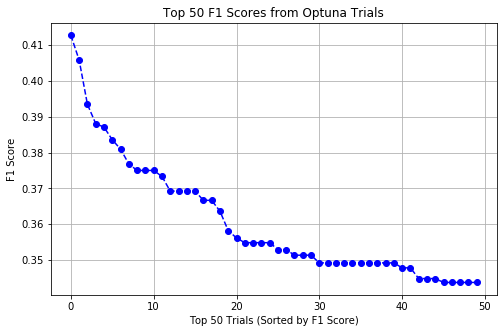

In [24]:
# Extract the best 50 F1 scores (sorted highest first)
best_50_f1_scores = sorted([trial.value for trial in study.trials if trial.value is not None], reverse=True)[:50]

# Plot the best 50 F1 Scores
plt.figure(figsize=(8, 5))
plt.plot(best_50_f1_scores, marker="o", linestyle="dashed", color="b")
plt.xlabel("Top 50 Trials (Sorted by F1 Score)")
plt.ylabel("F1 Score")
plt.title("Top 50 F1 Scores from Optuna Trials")
plt.grid(True)
plt.show()

In [232]:
for trial in study.trials:
    if trial.value is not None:  # Skip failed trials
        print(f"Trial {trial.number}: F1 Score = {trial.value:.4f}")
        print(f"Parameters: {trial.params}\n")
    else:
        print(f"⚠️ Trial {trial.number} failed or was pruned.")

⚠️ Trial 0 failed or was pruned.
Trial 1: F1 Score = 0.0000
Parameters: {'boosting_type': 'gbdt', 'num_leaves': 78, 'learning_rate': 0.01460427800803549, 'n_estimators': 3458, 'max_bin': 226, 'subsample': 0.5958346034747558, 'subsample_freq': 3, 'colsample_bytree': 0.7070779258196175, 'min_child_samples': 7}

Trial 2: F1 Score = 0.1039
Parameters: {'boosting_type': 'gbdt', 'num_leaves': 51, 'learning_rate': 0.14095586540736216, 'n_estimators': 2186, 'max_bin': 273, 'subsample': 0.5098693800663303, 'subsample_freq': 7, 'colsample_bytree': 0.6034883186113542, 'min_child_samples': 29}

Trial 3: F1 Score = 0.1364
Parameters: {'boosting_type': 'dart', 'num_leaves': 60, 'learning_rate': 0.04803985686104241, 'n_estimators': 4618, 'max_bin': 146, 'subsample': 0.8782278964799501, 'subsample_freq': 3, 'colsample_bytree': 0.5576502438014332, 'min_child_samples': 13}

Trial 4: F1 Score = 0.0930
Parameters: {'boosting_type': 'dart', 'num_leaves': 49, 'learning_rate': 0.053316163250033376, 'n_estima

In [ ]:

study.optimize(objective, n_trials=50)  # Continue for 50 more trials

## Method 3 - pay attention to imbalenced

In [172]:
bigModel = lgb.LGBMClassifier(class_weight="balanced")
bigModel.fit(X_train, y_train)
y_pred_proba = bigModel.predict_proba(X_test)[:, 1]  # Get probability for class 1
y_pred = (y_pred_proba >= 0.3).astype(int)  # Convert probabilities to 0/1

In [173]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.519231
Recall: 0.500000
F1 Score: 0.5094


## Method 4 lower prob to 0,2

In [139]:
y_pred_proba = bigModel.predict_proba(X_test)[:, 1]  # Get probability of class 1
y_pred = (y_pred_proba >= 0.2).astype(int) 

In [140]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.454545
Recall: 0.277778
F1 Score: 0.3448


In [48]:
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

{0: 7580, 1: 64}


In [41]:
print(y_train.value_counts(normalize=True)) 

0    0.992935
1    0.007065
Name: biao, dtype: float64


## 5. Undersample the Majority Class

In [67]:
from imblearn.over_sampling import SMOTE

In [95]:
print(f"NaN count in X_train: {np.isnan(X_train).sum().sum()}")
print(f"Infinity count in X_train: {np.isinf(X_train).sum().sum()}")

NaN count in X_train: 94807
Infinity count in X_train: 0


In [96]:
X_train = X_train.fillna(0)

In [98]:
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name="target")      

In [101]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [102]:
if X_train.columns.isnull().any():
    X_train.columns = [f"col_{i}" for i in range(X_train.shape[1])] 

In [103]:
X_train = X_train.astype("float32") 

In [107]:
X_train.columns = [f"{col}_{i}" if X_train.columns.tolist().count(col) > 1 else col 
                   for i, col in enumerate(X_train.columns)]

In [108]:
smote = SMOTE(sampling_strategy=0.1, random_state=42)  # Balance classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [156]:
bigModel = lgb.LGBMClassifier()
bigModel.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_proba = bigModel.predict_proba(X_test)[:, 1]  # Get probability scores
y_pred = (y_pred_proba >= 0.5).astype(int)  # Convert probabilities to binary 0/1

In [161]:
y_pred = (y_pred_proba >= 0.3).astype(int)

In [163]:
# Evaluate Performance
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.6000
Recall: 0.2222
F1 Score: 0.3243


## 6. RNN models

In [187]:
# Define time steps (how many sequential columns make one sequence)
time_steps = 4  # Adjust this based on how much sequence dependency you want to capture

# Reshape X_train
num_samples = X_train.shape[0]
num_features = X_train.shape[1] // time_steps  # Assuming all features form a sequence

# Ensure data reshapes correctly
if X_train.shape[1] % time_steps != 0:
    print("⚠️ Warning: Features do not perfectly divide into time steps!")

X_train_rnn = X_train.values.reshape(num_samples, time_steps, num_features)
X_test_rnn = X_test.values.reshape(X_test.shape[0], time_steps, num_features)

In [188]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build RNN Model
rnn_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, num_features)),  # First LSTM layer
    Dropout(0.2),
    LSTM(32, return_sequences=False),  # Second LSTM layer
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output (0 or 1)
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [189]:
# Train the RNN model
rnn_model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))


Epoch 1/20
956/956 [==============================] - 6s 4ms/step - loss: 0.0481 - accuracy: 0.9922 - val_loss: nan - val_accuracy: 0.9929
Epoch 2/20
956/956 [==============================] - 4s 4ms/step - loss: 0.0333 - accuracy: 0.9929 - val_loss: nan - val_accuracy: 0.9929
Epoch 3/20
956/956 [==============================] - 4s 4ms/step - loss: 0.0289 - accuracy: 0.9929 - val_loss: nan - val_accuracy: 0.9929
Epoch 4/20
956/956 [==============================] - 3s 3ms/step - loss: 0.0279 - accuracy: 0.9929 - val_loss: nan - val_accuracy: 0.9929
Epoch 5/20
956/956 [==============================] - 3s 4ms/step - loss: 0.0269 - accuracy: 0.9929 - val_loss: nan - val_accuracy: 0.9929
Epoch 6/20
956/956 [==============================] - 3s 4ms/step - loss: 0.0260 - accuracy: 0.9929 - val_loss: nan - val_accuracy: 0.9929
Epoch 7/20
956/956 [==============================] - 3s 3ms/step - loss: 0.0260 - accuracy: 0.9929 - val_loss: nan - val_accuracy: 0.9929
Epoch 8/20
956/956 [=======

In [209]:
# Predict probabilities
y_pred_proba = rnn_model.predict(X_test_rnn)

# Convert probabilities to binary values (adjust threshold if needed)
y_pred = (y_pred_proba >= 0.2).astype(int)


In [210]:
from sklearn.metrics import classification_report

# Print precision, recall, and F1-score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7590
           1       0.27      0.35      0.31        54

    accuracy                           0.99      7644
   macro avg       0.63      0.67      0.65      7644
weighted avg       0.99      0.99      0.99      7644



In [211]:
# Evaluate Performance
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.2714
Recall: 0.3519
F1 Score: 0.3065


In [207]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [208]:
unique, counts = np.unique(y_pred, return_counts=True)
print("\n🔹 Prediction Counts:")
print(dict(zip(unique, counts)))


🔹 Prediction Counts:
{0: 7604, 1: 40}


## LSTM

In [148]:
X_train_trimmed.shape

(30572, 200)

In [149]:
X_test_trimmed.shape

(7644, 200)

In [166]:
# Define time steps (how many sequential columns make one sequence)
time_steps = 5 # Adjust this based on how much sequence dependency you want to capture

# Reshape X_train
num_samples = X_train_trimmed.shape[0]
num_features = X_train_trimmed.shape[1] // time_steps  # Assuming all features form a sequence

# Ensure data reshapes correctly
if X_train_trimmed.shape[1] % time_steps != 0:
    print("⚠️ Warning: Features do not perfectly divide into time steps!")

X_train_lstm = X_train_trimmed.values.reshape(num_samples, time_steps, num_features)
X_test_lstm = X_test_trimmed.values.reshape(X_test.shape[0], time_steps, num_features)

In [170]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Define LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(time_steps, num_features)),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile with class weighting for imbalance
optimizer = Adam(learning_rate=0.001, clipvalue=1.0)
lstm_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [171]:
X_train_lstm = np.nan_to_num(X_train_lstm, nan=0.0, posinf=0.0, neginf=0.0)
X_test_lstm = np.nan_to_num(X_test_lstm, nan=0.0, posinf=0.0, neginf=0.0)
y_train = np.nan_to_num(y_train, nan=0.0, posinf=0.0, neginf=0.0)

In [172]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Train LSTM model with class weights
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, 
               class_weight=class_weights_dict)

Epoch 1/20
956/956 [==============================] - 7s 4ms/step - loss: 0.4549 - accuracy: 0.7920
Epoch 2/20
956/956 [==============================] - 4s 4ms/step - loss: 0.3190 - accuracy: 0.8377
Epoch 3/20
956/956 [==============================] - 4s 4ms/step - loss: 0.3371 - accuracy: 0.8384
Epoch 4/20
956/956 [==============================] - 4s 5ms/step - loss: 0.2774 - accuracy: 0.8509
Epoch 5/20
956/956 [==============================] - 4s 4ms/step - loss: 0.2590 - accuracy: 0.8684
Epoch 6/20
956/956 [==============================] - 4s 4ms/step - loss: 0.2541 - accuracy: 0.8700
Epoch 7/20
956/956 [==============================] - 4s 4ms/step - loss: 0.2721 - accuracy: 0.8575
Epoch 8/20
956/956 [==============================] - 4s 4ms/step - loss: 0.2333 - accuracy: 0.8693
Epoch 9/20
956/956 [==============================] - 4s 4ms/step - loss: 0.2379 - accuracy: 0.8795
Epoch 10/20
956/956 [==============================] - 4s 4ms/step - loss: 0.2339 - accuracy: 0.8722

In [182]:
# Predict probabilities
y_pred_proba = lstm_model.predict(X_test_lstm)

# Convert probabilities to binary values (adjust threshold if needed)
y_pred = (y_pred_proba >= 0.8).astype(int)


In [185]:
# Count occurrences of 0s and 1s
unique, counts = np.unique(y_pred, return_counts=True)
print("\n🔹 Prediction Counts:")
print(dict(zip(unique, counts)))


🔹 Prediction Counts:
{0: 7048, 1: 596}


In [183]:
# Evaluate Performance
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.0805
Recall: 0.8889
F1 Score: 0.1477


## TabNet

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

# Define and train the model
tabnet = TabNetClassifier(verbose=1, optimizer_params=dict(lr=2e-2))
tabnet.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric=['auc'])

# Get predictions
y_pred_proba = tabnet.predict_proba(X_test)[:, 1]

## GRU

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score

In [36]:
time_steps = X_train.shape[1]
num_samples = X_train.shape[0]
num_features = X_train.shape[1] // time_steps  # Assuming all features form a sequence

params = {
    "gru_units": 64,
    "dense_units": 32,
    "dropout_rate": 0.2,
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 10
}

IndexError: tuple index out of range

In [39]:
X_train.shape[1]

671

In [24]:
# Define time steps (how many sequential columns make one sequence)
time_steps = 5 # Adjust this based on how much sequence dependency you want to capture

a# Reshape X_train
num_samples = X_train.shape[0]
num_features = X_train.shape[1] // time_steps  # Assuming all features form a sequence

# Ensure data reshapes correctly
if X_train.shape[1] % time_steps != 0:
    print("⚠️ Warning: Features do not perfectly divide into time steps!")

⚠️ Warning: Features do not perfectly divide into time steps!


In [29]:
X_train.shape[1] /4

167.75

In [22]:
X_train_gru = X_train.values.reshape(num_samples, time_steps, num_features)
X_test_gru = X_test.values.reshape(X_test.shape[0], time_steps, num_features)

ValueError: cannot reshape array of size 20513812 into shape (30572,4,167)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the GRU-based model
gru_model = Sequential([
    GRU(64, return_sequences=True, input_shape=(time_steps, num_features)),  # First GRU layer
    Dropout(0.2),
    GRU(32, return_sequences=False),  # Second GRU layer
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
optimizer = Adam(learning_rate=0.0005, clipnorm=1.0)  # Clipping prevents NaN loss
gru_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the GRU model
gru_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20


ValueError: in user code:

    File "C:\Users\Andy\Anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Andy\Anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Andy\Anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Andy\Anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Andy\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Andy\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 4, 167), found shape=(None, 671)
